## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### Dynamic Programming 

In [3]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [4]:
len(original_price)

10

In [5]:
from collections import defaultdict
price = defaultdict(int)

In [6]:
for i, p in enumerate(original_price):
    price[i+1] = p

In [7]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30})

#### Get the splitting to maximize the price

In [11]:
call_time_with_arg = defaultdict(int)

In [12]:
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
#     fname = r.__name__
#     call_time_with_arg[(fname, n)] += 1
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [13]:
r(15)

43

In [15]:
from collections import Counter
Counter(call_time_with_arg).most_common()

[(('r', 1), 3188646),
 (('r', 2), 1062882),
 (('r', 3), 354294),
 (('r', 4), 118098),
 (('r', 5), 39366),
 (('r', 6), 13122),
 (('r', 7), 4374),
 (('r', 8), 1458),
 (('r', 9), 486),
 (('r', 10), 162),
 (('r', 11), 54),
 (('r', 12), 18),
 (('r', 13), 6),
 (('r', 14), 2),
 (('r', 15), 1)]

In [27]:
r(10)

30

In [33]:
r(15)

43

In [38]:
r(15)

43

In [79]:
called_time_with_arg = defaultdict(int)  # initialize to zero

In [75]:
# import decorator to count the function called times

def count_func_called_times(func):
    
    def wrapper(n):
        # This is the function after wrapped; Here only decorating it with count ability
        result = func(n)
        called_time_with_arg[(func.__name__, n)] += 1
        return result
    
    return wrapper

In [76]:
@count_func_called_times
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [77]:
r(15)

43

In [78]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 3188646,
             ('r', 2): 1062882,
             ('r', 3): 354294,
             ('r', 4): 118098,
             ('r', 5): 39366,
             ('r', 6): 13122,
             ('r', 7): 4374,
             ('r', 8): 1458,
             ('r', 9): 486,
             ('r', 10): 162,
             ('r', 11): 54,
             ('r', 12): 18,
             ('r', 13): 6,
             ('r', 14): 2,
             ('r', 15): 1})

In [71]:
r

<function __main__.count_func_called_times.<locals>.wrapper(n)>

In [81]:
# add another decorator to try cache first to save time

def use_cache(func):
    
    use_cache.already_computed = {}
    
    def wrapper(n):
        if n in use_cache.already_computed:
            result = use_cache.already_computed[n]
        else:
            result = func(n)
            use_cache.already_computed[n] = result
    
        return result
    
    return wrapper
    

In [82]:
@count_func_called_times
@use_cache
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [87]:
r(234)

700

In [88]:
called_time_with_arg

defaultdict(int,
            {('wrapper', 1): 466,
             ('wrapper', 2): 464,
             ('wrapper', 3): 462,
             ('wrapper', 4): 460,
             ('wrapper', 5): 458,
             ('wrapper', 6): 456,
             ('wrapper', 7): 454,
             ('wrapper', 8): 452,
             ('wrapper', 9): 450,
             ('wrapper', 10): 449,
             ('wrapper', 11): 446,
             ('wrapper', 12): 444,
             ('wrapper', 13): 442,
             ('wrapper', 14): 440,
             ('wrapper', 15): 438,
             ('wrapper', 16): 436,
             ('wrapper', 17): 434,
             ('wrapper', 18): 432,
             ('wrapper', 19): 430,
             ('wrapper', 20): 429,
             ('wrapper', 21): 426,
             ('wrapper', 22): 424,
             ('wrapper', 23): 422,
             ('wrapper', 24): 420,
             ('wrapper', 25): 418,
             ('wrapper', 26): 416,
             ('wrapper', 27): 414,
             ('wrapper', 28): 412,
            

#### Suppot optimal split

In [94]:
solution = {}

In [95]:
@count_func_called_times
@use_cache
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    
    solution[n] = (n - max_split, max_split)
    
    return max_price

In [98]:
r(38)

112

In [99]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (10, 1),
 12: (10, 2),
 13: (10, 3),
 14: (12, 2),
 15: (13, 2),
 16: (10, 6),
 17: (16, 1),
 18: (16, 2),
 19: (16, 3),
 20: (10, 10),
 21: (20, 1),
 22: (20, 2),
 23: (20, 3),
 24: (22, 2),
 25: (23, 2),
 26: (20, 6),
 27: (26, 1),
 28: (26, 2),
 29: (26, 3),
 30: (20, 10),
 31: (30, 1),
 32: (30, 2),
 33: (30, 3),
 34: (32, 2),
 35: (33, 2),
 36: (30, 6),
 37: (36, 1),
 38: (36, 2)}

In [111]:
parse_solution = 2

In [120]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [123]:
parse_solution(38)

[10, 10, 10, 6, 2]

#### Machine Learning and Gradient Descent

In [124]:
from sklearn.datasets import load_boston

In [152]:
data = load_boston()

In [ ]:
data = load_boston

In [132]:
X, Y = data['data'], data['target']

In [134]:
X.shape

(506, 13)

In [135]:
Y.shape

(506,)

In [139]:
type(X)

numpy.ndarray

In [150]:
X?

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

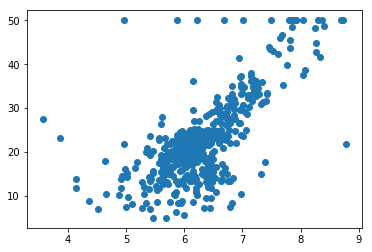

In [154]:
draw_rm_and_price()

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [162]:
def loss(Y, Y_hat):
    return sum(abs( Y - Y_hat)) / len(Y)

In [160]:
# Calcualte the gradient of loss function
def partial_k(Y, Y_hat):
    # when y > y_hat, derivative to y_hat is -1
    # when y < y_hat, derivative to y_hat is 1
    # when y == y_hat, math derivative does not exist, here we specify it as zero
    

### Part 3: Finish the Solution Parse Part of Edit-Distance

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

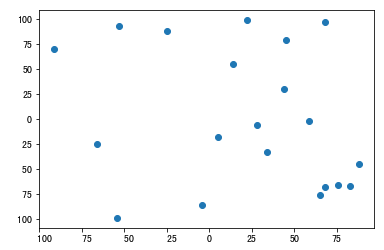

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

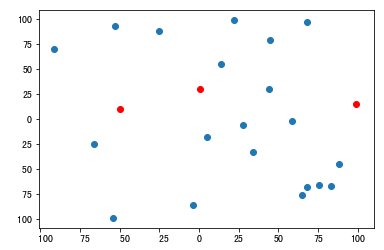

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro